# Introduction to Cellular Automata with Python
Cellular automata (CA) are mathematical models used to simulate complex systems using simple, discrete rules on a grid of cells. Each cell in a grid can be in one of several possible states (e.g., alive or dead) and interacts with its neighboring cells to determine its next state. Cellular automata are useful in modeling phenomena like patterns in nature, biological systems, and artificial life.

### Conway's Game of Life

Conway’s Game of Life is a fascinating example of **cellular automata** developed by mathematician John Conway in 1970. It operates on a two-dimensional grid of cells, where each cell can be in one of two states: 

- **Alive** (represented by 1)
- **Dead** (represented by 0)

## Rules of the Game

Each cell interacts with its eight neighboring cells (including diagonals) according to the following simple rules:

1. **Underpopulation**: A live cell with fewer than two live neighbors dies in the next generation.
2. **Overpopulation**: A live cell with more than three live neighbors dies in the next generation.
3. **Survival**: A live cell with two or three live neighbors survives to the next generation.
4. **Reproduction**: A dead cell with exactly three live neighbors becomes a live cell in the next generation.


In [5]:
import numpy as np

In [6]:
N = 2000
p = 1/3
grid = np.random.binomial(1, p, size=(N,N))
np.sum(grid)/(N*N)

np.float64(0.3333875)

In [7]:
grid

array([[0, 0, 1, ..., 1, 1, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 1, 0, ..., 0, 1, 1],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [3]:
kernel = np.array([[1,1,1],[1,0,1],[1,1,1]])
kernel

array([[1, 1, 1],
       [1, 0, 1],
       [1, 1, 1]])

In [4]:
from scipy.signal import convolve2d

In [14]:
neighbors = convolve2d(grid, kernel, 
                       mode='same', boundary='fill') 

In [15]:
grid = ((neighbors == 3) | ((grid == 1) & (neighbors == 2))).astype(int)
grid

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 0]])

```python
grid = ((neighbors == 3) | ((grid == 1) & (neighbors == 2))).astype(int)
```

In [17]:
from tqdm import tqdm

In [18]:
N = 2000
p = 1/3
T = 200
grid = np.random.binomial(1, p, size=(N,N))
for t in tqdm(range(T)):
    neighbors = convolve2d(grid, kernel, 
                           mode='same', boundary='fill') 
    grid = ((neighbors == 3) | ((grid == 1) & (neighbors == 2))).astype(int)

100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [00:17<00:00, 11.64it/s]


In [21]:
np.sum(grid)

np.int64(293441)

In [23]:
import matplotlib.pyplot as plt

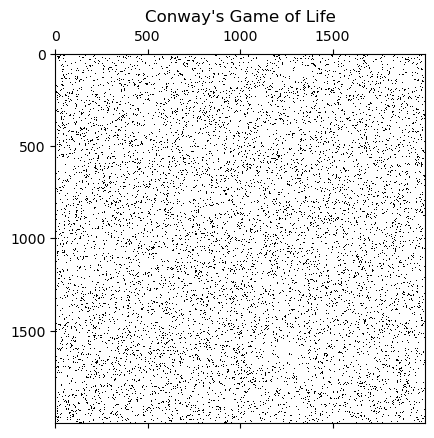

In [24]:
#Plot the cellular automaton
fig, ax = plt.subplots()
mat = ax.matshow(grid, cmap="binary")
plt.title("Conway's Game of Life")

plt.show()

In [25]:
def update_grid(grid):
    neighbors = convolve2d(grid, kernel, 
                           mode='same', boundary='fill') 
    return ((neighbors == 3) | ((grid == 1) & (neighbors == 2))).astype(int)

In [30]:
from matplotlib.animation import FuncAnimation

In [31]:
# Function to update the grid and refresh the plot at each animation frame
def update(frame):
    global grid
    grid = update_grid(grid)
    mat.set_data(grid)
    return [mat]

# Step 5: Animate the Game of Life
ani = FuncAnimation(fig, update, interval=200, save_count=50)
plt.show()